# 2.5 Matplotlib 基础

Matplotlib 最常用的绘图模块是 pyplot 模块，它提供了一种类似于 MATLAB 的绘图方法， pyplot 中的绘图函数通常需要以 Numpy 的 dnarray 或 numpy.ma.masked_array 类型的数据作为输入。因此在绘图前，通常需要导入相应的模块或包：

In [1]:
import matplotlib
matplotlib.__version__ #显示 Matplotlib 版本号

'3.5.1'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 2.5.1 基础概念

Matplotlib 有两个基本的概念：图形（figure）和轴（axes）。Figure 相当于进行画图 的窗口或画板，所有要绘制的对象都要放置其中，一个 figure 可以包含一个或多个 axes。 而 axes 也被称为子图或轴域，是绘制一组数据的区域，可包含子图的标题（title），图形 图例名称（legend），xy 坐标轴或进行三维绘图时使用的 z 坐标轴的轴名称（axis label）、 刻度、最大刻度，以及要绘制的点、线、形状、文本等各种信息，这些统称为组件（artist）。 以下是绘图的简单举例：

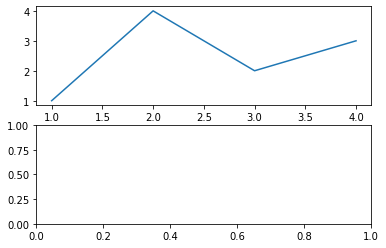

In [3]:
fig, ax = plt.subplots(2,1) #生成 figure 及包含于其中的 2 行 1 列共 2 个 axes 子图
ax[0].plot([1, 2, 3, 4], [1, 4, 2, 3]) #在子图 1 上绘制数据，两个列表分别表示数 据的横纵坐标，即四个点的坐标分别为（1,1），（2,4），（3,2），（4,3）

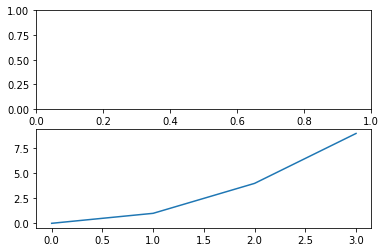

In [4]:
fig, ax = plt.subplots(2,1) #生成 figure 及包含于其中的 2 行 1 列共 2 个 axes 子图
ax[1].plot([0, 1, 4, 9]) #在子图 2 上绘制数据，参数列表表示数据的纵坐标，横坐标默 认从 0 开始的整数值，即[0,1,2,3]，因此四个点的坐标分别为（0,0），（1,1），（2,4），（3,9）

本例中，fig, ax = plt.subplots(2,1)语句生成了 figure 对象和 2 个 axes 对象。两个 axes 对 象 ax[0]、ax[1]的排列是 2 行 1 列。若语句为 fig, ax = plt.subplots(3, 2)，则表示生成 3 行 2 列 共计 6 个 axes 对象，分别表示为 ax[0][0]或 ax[0,0]、ax[0][1]或 ax[0,1]、ax[1][0]或 ax[1,0]、…、 ax[2][1]或 ax[2,1]。若参数为空，即 fig, ax = plt.subplots()，则只生成 1 个 axes 对象，对象名 为 ax。


生成 figure 对象和 axes 对象的方法有很多，例如如下语句也可以分别生成相关对象：

In [5]:
fig = plt.figure() #生成不包含 axes 的 figure 对象，为当前图形对象
fig #当前图形对象没有子图

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

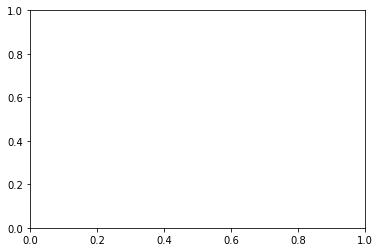

In [6]:
ax = plt.axes() #在当前图形下，生成 axes 轴对象
fig #当前图形对象含有了 1 个子图

Matplotlib 支持面向对象方式（object-oriented-style）和 pyplot 方式（pyplot-style）两种 类型的绘图方法。前面的绘图简单举例就是面向对象方式进行绘图，面向对象方式显式地创 建图形 figure 和轴 axes 对象，并用这些对象直接调用自己的方法进行绘制图形。而 pyplot 方式类似于 MATLAB 形式的绘图方法，依靠 pyplot 自动创建和管理图形 figure 和轴 axes，并 使用 pyplot 自己的函数进行绘图。因此，这种方法会跟踪当前要操作的图形 figure 和坐标轴 axes，在绘制比较简单的图形时比较方便，但难以进行比较复杂的绘图操作，如在不同的子 图间切换。以下是采用 pyplot 方式的绘图示例。

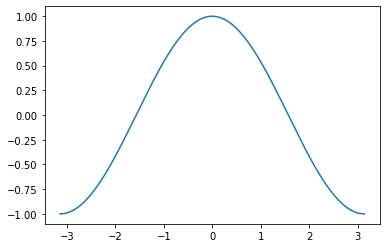

In [7]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True) #从-π到π均匀取 256 个点
C,S = np.cos(X), np.sin(X) #分别得到这些点的余弦值和正弦值生成的一维数组
plt.plot(X,C) #横坐标为 X，纵坐标为 C，绘制连线

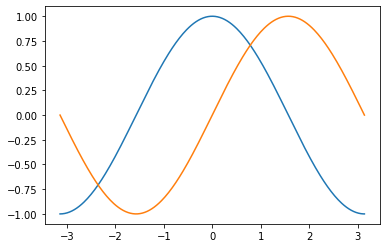

In [8]:
plt.plot(X,C) #横坐标为 X，纵坐标为 C，绘制连线
plt.plot(X,S) #横坐标为 X，纵坐标为 S，绘制连线
plt.show()

## 2.5.2 不同环境下的图形显示

Jupyter Notebook 也是我们常用的 python 开发环境，其图形展示方式与在 IPython 中类似，也需要使用%matplotlib 命令。在 Jupyter Notebook 中，有两种图形展现形式：

In [9]:
%matplotlib notebook 
%matplotlib inline 

采用 notebook 模式时，Matplotlib 会在 Jupyter Notebook 中绘制交互式的图形，类似于 IPython 中的绘图方式。而 inline 模式绘制的则是静态图形，绘制的图形就会以 PNG 格式嵌入在 Jupyter Notebook 单元之中。

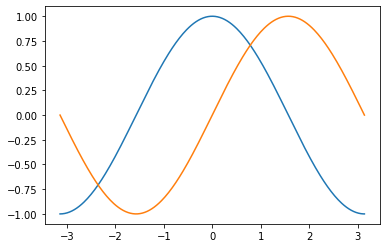

In [10]:
# %matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True) #从-π到π均匀取 256 个点
C,S = np.cos(X), np.sin(X) #分别得到这些点的余弦值和正弦值生成的一维数组
plt.plot(X,C) #横坐标为 X，纵坐标为 C，绘制连线
plt.plot(X,S) #横坐标为 X，纵坐标为 S，绘制连线

若想把绘制的图像保存成图像文件，可直接使用 fig.savefig()函数，函数的参数是文件名， 文件的扩展名可以是 Matplotlib 支持的各种文件类型。例如：

In [11]:
fig.savefig("a.jpg")

## 2.5.3 Matplotlib 绘图样式

Matplotlib 在绘制图形时，不但可以设置线条和数据点的样式，也可以设置坐标轴信息、 图例信息等。 

（1）设置线条样式 前面的例子使用了 plot 函数绘制数据，默认数据点是通过直线顺序连接的。实际上可 以设置各种绘制样式，如连线形状、颜色、线宽、标记点（marker）等。

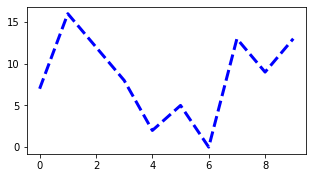

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
y1, y2 = np.random.randint(20,size=(2,10))
x = np.arange(len(y1))
ax.plot(x, y1, color='blue', linewidth=3, linestyle='--')

In [13]:
line,= ax.plot(x, y2, color='orange', linewidth=2, marker='o')
line.set_linestyle(':') #设置连线形状为点线
fig.show()

<ipython-input-13-1e9b3cc34612>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


（2）设置坐标轴上下限 

在绘制图形时，Matplotlib 会自动为图形选择最合适的坐标轴上下限，但是有时为了绘制的图形更美观，也可以自定义坐标轴上下限。调整坐标轴上下限最基础的方法是使用 set_xlim 和 set_ylim 函数，也可以直接使用 axis 函数同时设置。例如：

In [14]:
ax.set_xlim(-6, 7) #设置 x 坐标轴上下限
ax.set_ylim(-2, 2) #设置 y 坐标轴上下限
ax.axis([-6, 7, -2, 2]) #同时设置两个坐标轴的上下限

(-6.0, 7.0, -2.0, 2.0)

（3）设置图名和坐标轴名称

图形的图名、坐标轴名称通常使用 set_title、set_xlabel、set_ylabel 函数设置。例如：

In [15]:
ax.set_title('Sine')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

Text(3.1999999999999993, 0.5, 'sin(x)')

（4）设置图例 

当一个子图中有多条线时，可以使用 legend 函数来创建图例来明确每条线的含义。在 使用 plot 函数绘图时，首先加入 label 参数设置每条线的名称，然后就可以使用 legend 得到 每条线对应的图例。legend 函数也有各种参数可以对图例的显示进行配置，例如：loc 参数 指定图例的位置、frameon 参数控制是否显示图例的边框、ncol 参数指定图例显示的列数、
fancybos 参数指定圆角图例边框、framealpha 参数改变边框透明度等。例如：

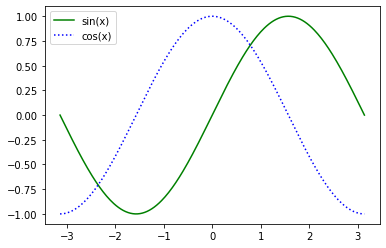

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 256)
ax.plot(x, np.sin(x), '-g', label='sin(x)') #'-g'表示线条样式为'-'，颜色为'g'
ax.plot(x, np.cos(x), ':b', label='cos(x)') #':b'表示线条样式为':'，颜色为'b'
ax.legend(fancybox=True)

（5）接口函数的使用 

上述介绍的接口函数，都是在面向对象方式的绘图中使用，而 pyplot 方式的绘图方法， 通常也都有对应的函数，例如：  

plt.plot()→ax.plot()  

plt.legend()→ax.legend()  

plt.xlabel()→ax.set_xlabel()  

plt.ylabel()→ax.set_ylabel()  

plt.xlim()→ax.set_xlim()  

plt.ylim()→ax.set_ylim()  

plt.title()→ax.set_title()

## 2.5.4 散点图绘制

Matplotlib 绘制散点图既可以使用前面介绍的 plot 函数，也可以使用 scatter 函数，后者 相对前者有更高的灵活性。以下代码给出了使用 plot 函数绘制散点图的示例，示例中，plot 函数的 marker 参数设为散点图形对应的字符。

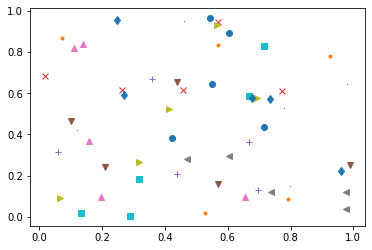

In [17]:
fig, ax = plt.subplots()
rng = np.random.RandomState(0) #生成伪随机数生成器，随机数种子为 0
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']: 
    ax.plot(rng.rand(5), rng.rand(5), marker, label='marker={}'.format(marker)) 

使用 scatter 函数是更为常见创建散点图的方式，可以设置每个散点具有不同的属性， 如大小、表面颜色、边框颜色等。示例如下：

<ipython-input-18-946eefdf96bb>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


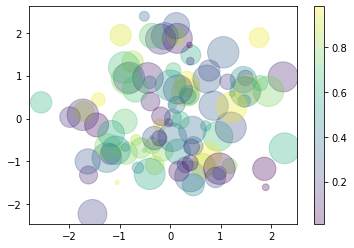

In [18]:
fig, ax = plt.subplots()
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
axs = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3)
fig.colorbar(axs, ax=ax) #设置右侧的颜色条
fig.show()

## 2.5.5 可视化误差

有时，我们需要展示多组数据的均值和方差。例如某个识别算法在不同超参数设定下训 练后在验证集下测试有不同的准确率，由于训练时的初始化参数是随机设置的，因此每次训 练得到的模型在验证集下测试准确率也不同。假定超参数取值从 0 到 10 共 11 个整数值，实 验共重复了 10 次，则可采用 errorbar 函数绘制误差线方法，将不同超参数下，算法准确率 的均值和方差数据的可视化结果显示出来。 

具体代码如下：

<ipython-input-19-7be6ac2f2414>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


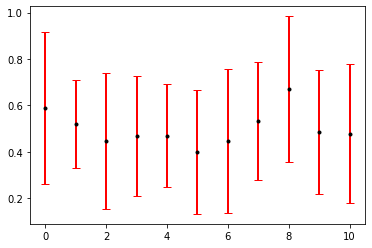

In [19]:
x = np.linspace(0, 10, 11) #11 个超参数值
y = np.random.rand(10, 11) #模拟 10 次实验不同超参数值下的准确率
mean=y.mean(axis=0) #按列求平均
std = y.std(axis=0) #按列求方差
fig, ax = plt.subplots()
ax.errorbar(x, mean, yerr=std, fmt='.k', ecolor='r', elinewidth=2, capsize=4)
fig.show()

## 2.5.6 二维平面常见绘图形式 

除了绘制散点、连线、误差线外，在二维平面上还可以绘制各种形式的图像。例如使用 bar 函数绘制柱形图，使用 contour 函数或 contourf 函数绘制等高线图、使用 hist 函数、hist2d 函数或 hexbin 函数绘制直方图，使用 pcolormesh 函数绘制伪彩色分类图等。关于这些函 数的使用不再详细介绍，以下代码给出了一些简单的示例。

<ipython-input-20-669beb95af27>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


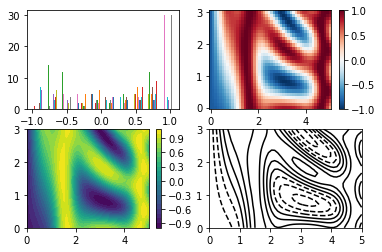

In [20]:
fig, ax = plt.subplots(2,2) #2 行 2 列四个子图 
x = np.linspace(0, 5, 50) 
y = np.linspace(0, 3, 30) 
X, Y = np.meshgrid(x, y) 
Z=np.sin(X) ** 10 + np.cos(10 + Y * X) * np.cos(X) 
h=ax[0][0].hist(Z) #左上子图绘制直方图 
axs01=ax[0,1].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r') #右上子图 
fig.colorbar(axs01,ax=ax[0,1]) #子图旁绘制色条
axs10=ax[1][0].contourf(X,Y,Z,20) #左下子图绘制带有填充色的等高线图 
fig.colorbar(axs10,ax=ax[1][0]) #子图旁绘制色条   
ax[1][1].contour(X,Y,Z,colors='k') #右下子图绘制等高线
fig.show()

## 2.5.7 绘制三维图形

创建三维坐标轴的常用方法是在调用 plt.axes 函数、fig.add_subplot 函数或 fig.gca 函数 时，加入 projection='3d'参数。下面是绘制螺旋线的示例，在螺旋线的附近加入了一些随机的点。

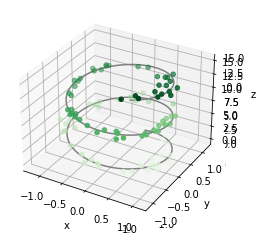

In [21]:
zline = np.linspace(0, 15, 1000)  
xline = np.sin(zline)  
yline = np.cos(zline)  
zdata = 15 * np.random.random(100)  
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)  
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)  
fig = plt.figure()  
ax = plt.axes(projection='3d')  
ax.plot3D(xline, yline, zline, 'gray')  
ax = plt.axes(projection='3d', xlabel='x', ylabel='y', zlabel='z' )  
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()

在三维曲面上也可以绘制其等高线、网格图和曲面图等。与绘制二维等高线相对应， Matplotlib 提供 contour3D 函数绘制三维的等高线图。绘制网格图和曲面图分别使用 plot_wireframe 函数和 plot_surface 函数，下面给出一些简单的绘制示例。

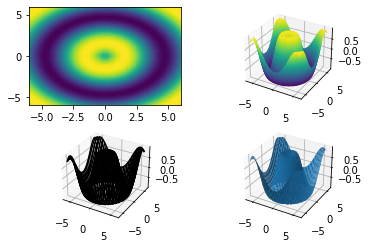

In [22]:
x = np.linspace(-6, 6, 30) 
y = np.linspace(-6, 6, 30) 
X, Y = np.meshgrid(x, y) 
Z = np.sin(np.sqrt(X ** 2 + Y ** 2)) 
fig = plt.figure() 
ax = fig.add_subplot (221) #221 表示当作 2 行 2 列，生成第 1 个二维子图，即左上子图 
ax.contourf(X, Y, Z, 50) #绘制二维等高线 
ax = fig.add_subplot (222, projection='3d') #生成第 2 个三维子图，即右上子图 
ax.contour3D(X, Y, Z, 50) #绘制三维等高线 
ax = fig.add_subplot (223, projection='3d') #生成第 3 个三维子图，即左下子图 
ax.plot_wireframe(X, Y, Z, color='black') #绘制网格图 
ax = fig.add_subplot (224, projection='3d') #生成第 4 个三维子图，即右下子图 
ax.plot_surface(X, Y, Z) #绘制曲面图 
plt.show()

在进行三维展示时，若呈现的效果因视角和遮挡不佳时，可以通过轴对象的 dist 控制观测距离，轴对象的 view_init 函数控制视角的变换。该函数有两个参数 elev 和 azim，分别表 示仰角（沿着 y 轴的旋转角度）和方位角（沿着 z 轴的旋转角度）。示例如下：

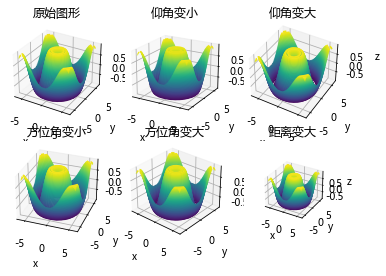

In [23]:
plt.rcParams[u'font.sans-serif'] = 'Microsoft YaHei' #设置中文显示字体 
plt.rcParams[u'axes.unicode_minus'] = False 
fig = plt.figure() 
ax = fig.add_subplot(231,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='原始图形')
c = ax.contour3D(X, Y, Z, 50) #X, Y, Z 为前例中的数据 
dist, elev, azim = ax.dist, ax.elev, ax.azim #得到观测距离、仰角和方位角 
ax = fig.add_subplot(232,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='仰角变小') 
c = ax.contour3D(X, Y, Z, 50) 
ax.view_init(elev=elev-10) #图形沿 y 方向顺时针旋转 10 度，仰角变小 
ax = fig.add_subplot(233,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='仰角变大') 
c = ax.contour3D(X, Y, Z, 50) 
ax.view_init(elev=elev+10) #图形沿 y 方向逆时针旋转 10 度，仰角变大 
ax = fig.add_subplot(234,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='方位角变小') 
c = ax.contour3D(X, Y, Z, 50) 
ax.view_init(azim=azim-10) #图形沿 z 方向逆时针旋转 10 度，方位角变小 
ax = fig.add_subplot(235,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='方位角变大') 
c = ax.contour3D(X, Y, Z, 50) 
ax.view_init(azim=azim+10) #图形沿 z 方向顺时针旋转 10 度，方位角变大 
ax = fig.add_subplot(236,projection='3d', xlabel='x', ylabel='y', zlabel='z', title='距离变大') 
c = ax.contour3D(X, Y, Z, 50) 
ax.dist = dist+5 #观测距离变大 
plt.show()